## Q2_Epilepsy

In [1]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, RFECV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
url='https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/epilepsy.data'
df = pd.read_csv(url)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.shape

(195, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          193 non-null    float64
 8   Jitter:DDP        194 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            2
Jitter:DDP          1
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
df['MDVP:PPQ'].fillna(df['MDVP:PPQ'].mean(),inplace=True)
df['Jitter:DDP'].fillna(df['Jitter:DDP'].mean(),inplace=True)
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003468,0.009932,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002751,0.008902,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001890,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002750,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


<AxesSubplot:xlabel='status', ylabel='count'>

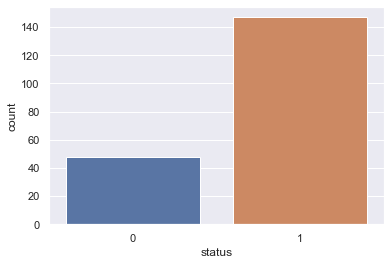

In [8]:
sns.countplot(x=df['status'])

In [9]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [10]:
# 1 --->Disease
# 0 --->Healthy

<Figure size 432x432 with 0 Axes>

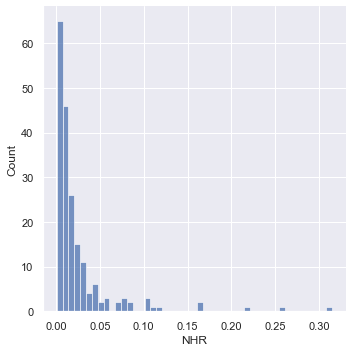

In [11]:
plt.figure(figsize=(6,6))
sns.displot(df['NHR'])
plt.show()

<Figure size 432x432 with 0 Axes>

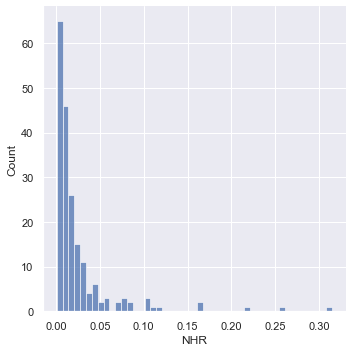

In [12]:
plt.figure(figsize=(6,6))
sns.displot(df['NHR'])
plt.show()

In [13]:
target = df['status']
df.drop(['name','status'],axis=1,inplace=True)

In [14]:
mm = MinMaxScaler()

In [15]:
mm.fit(df)

MinMaxScaler()

In [16]:
df = mm.transform(df)

In [17]:
df = pd.DataFrame(df,columns=mm.feature_names_in_)


In [18]:
x_train,x_test,y_train,y_test = train_test_split(df,target,test_size=0.2,random_state=5)

In [19]:
dtr = DecisionTreeClassifier(random_state=7)

In [20]:
dtr.fit(x_train,y_train)

DecisionTreeClassifier(random_state=7)

In [21]:
print('Scores :-\n')
print('Train:  ',dtr.score(x_train,y_train))
print('Test:  ',dtr.score(x_test,y_test))
print('Whole:  ',dtr.score(df,target))

Scores :-

Train:   1.0
Test:   0.9230769230769231
Whole:   0.9846153846153847


In [22]:
param_grid={
    'max_depth':[20,19,18,17,15,14,13,12,11,10],
    'max_features':['sqrt','log2']
}

gsc = GridSearchCV(estimator=dtr,param_grid=param_grid,cv=5)

In [23]:
gsc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=7),
             param_grid={'max_depth': [20, 19, 18, 17, 15, 14, 13, 12, 11, 10],
                         'max_features': ['sqrt', 'log2']})

In [24]:
#lets create new model using above data

In [25]:
dtr2 = DecisionTreeClassifier(max_depth=20,max_features='sqrt',random_state=6)

In [26]:
dtr2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=20, max_features='sqrt', random_state=6)

In [27]:
print('Scores :-\n')
print('Train:  ',dtr2.score(x_train,y_train))
print('Test:  ',dtr2.score(x_test,y_test))
print('Whole:  ',dtr2.score(df,target))

Scores :-

Train:   1.0
Test:   0.8717948717948718
Whole:   0.9743589743589743


In [28]:
cm = confusion_matrix(y_test,dtr2.predict(x_test))

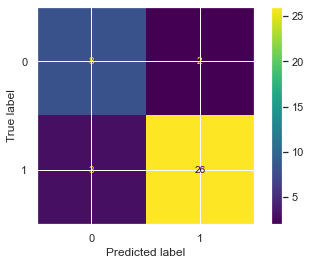

In [29]:
ConfusionMatrixDisplay(cm).plot()

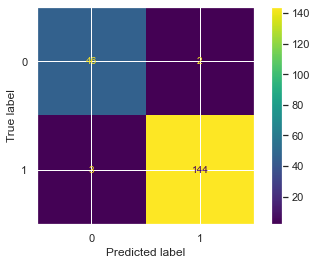

In [30]:
cm2 = confusion_matrix(target,dtr2.predict(df))
ConfusionMatrixDisplay(cm2).plot()

In [31]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [32]:
print('Scores :-\n')
print('Train:  ',model.score(x_train,y_train))
print('Test:  ',model.score(x_test,y_test))
print('Whole:  ',model.score(df,target))

Scores :-

Train:   0.9102564102564102
Test:   0.8461538461538461
Whole:   0.8974358974358975


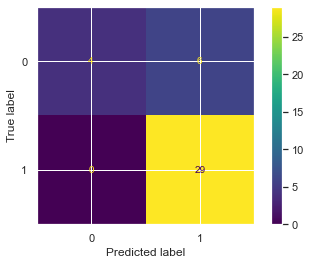

In [33]:
cm = confusion_matrix(y_test,model.predict(x_test))
ConfusionMatrixDisplay(cm).plot()

In [34]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [35]:
print('Scores :-\n')
print('Train:  ',knn.score(x_train,y_train))
print('Test:  ',knn.score(x_test,y_test))
print('Whole:  ',knn.score(df,target))

Scores :-

Train:   0.9358974358974359
Test:   1.0
Whole:   0.9487179487179487


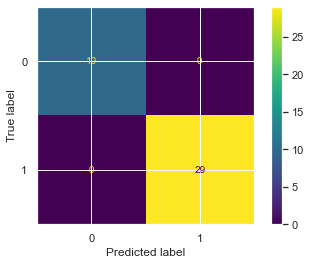

In [36]:
cm = confusion_matrix(y_test,knn.predict(x_test))
ConfusionMatrixDisplay(cm).plot()